In [1]:
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(os.path.join(project_root, 'src'))

from data_visualizations.dataframes import build_dataframe_from_json, build_dataframe_from_db
from data_visualizations.nilu import nilu_plotly, get_cleaned_data_path

json_df = build_dataframe_from_json('cleaned_data_nilu.json')
db_df = build_dataframe_from_db('frost.db', 'weather_data')
nilu_plotly = nilu_plotly(get_cleaned_data_path('cleaned_data_nilu.json'))

# 📊 Data visualisering og analyse

Denne notebooken bygger videre på data vi har hentet og renset fra både **Frost** og **NILU**. Vi skal nå starte analysen og visualiseringen av dataen og forsøke å trekke ut meningsfull innsikt. Vi vil bruke visuelle fremstillinger for å forstå variasjoner, sammenhenger og trender i miljødataen. Først skal vi se luftkvaliteten i Trondheim før vi går videre på været.

Målet er å identifisere mønstre som er interessante i seg selv (f.eks. hvordan luftkvalitet varierer gjennom året), men også å gi et godt kunnskaps og sammenlignings-grunnlag for å forstå den prediktive analysen i neste steg av prosjektet.

### 🌫️ - Luftkvaliteten i Trondheim
Først skal vi få oversikt over statistiske verdier som gjennomsnitt, median og standaravvik over ulike luftkvalitets indikatorer, som gir oss en rask oversikt over dataens fordeling, variasjon og typiske verdier. Dette hjelper oss med å forstå dataen og identifisere eventuelle avvik eller mønstre.

**DataFrame over luftkvalitet**

In [2]:
print(json_df)

     dateTime      NO2     PM10    PM2.5  generated_NO2  generated_PM10  generated_PM2.5
0  2010-01-01  25.7208  39.1000  12.8957          False           False             True
1  2010-01-02  26.8000  30.8542  12.8248          False           False             True
2  2010-01-03  13.3208   9.7208   8.5542          False           False            False
3  2010-01-04  47.7167  23.6708  20.7542          False           False            False
4  2010-01-05  47.4542  25.8250  24.9000          False           False            False
5  2010-01-06  59.3042  39.9417  18.6051          False           False             True


Videre ønsker vi å se på datasettet i sin helhet. Til dette har vi brukt plotly for å lage en interaktiv graf, hvor man selv enkelt kan filtrere ut enkelte verdier, skalere tidslinjen og lese av nøyaktige verdier for hver observasjon.

In [3]:
# Hente inn ploty over NILU
nilu_plotly.show()

Litt om en annen visualiseringen

In [4]:
# Hente inn visualiseringen nevnt overfor

### 🌦️ - Været i Trondheim
Nå går vi fra luftkvalitet til værdata og skal undersøke været i Trondheim de siste årene. Som med luftkvaliteten starter vi med å analysere statistikken for å få en god oversikt over dataene. 

In [5]:
# Hente inn dataframe for Frost
print(db_df)

  referenceTime  mean_air_temperature  mean_wind_speed  total_precipitation  generated_mean_air_temperature  generated_mean_wind_speed  generated_total_precipitation
0    2010-01-01                 -10.0              1.6                  2.1                               0                          0                              0
1    2010-01-02                 -13.5              2.6                  0.1                               0                          0                              0
2    2010-01-03                  -2.3              3.0                  1.1                               0                          0                              0
3    2010-01-04                  -4.7              2.8                  7.9                               0                          0                              0
4    2010-01-05                 -15.8              2.7                  0.4                               0                          0                              0
5   

### 🌦️ - FROST Data

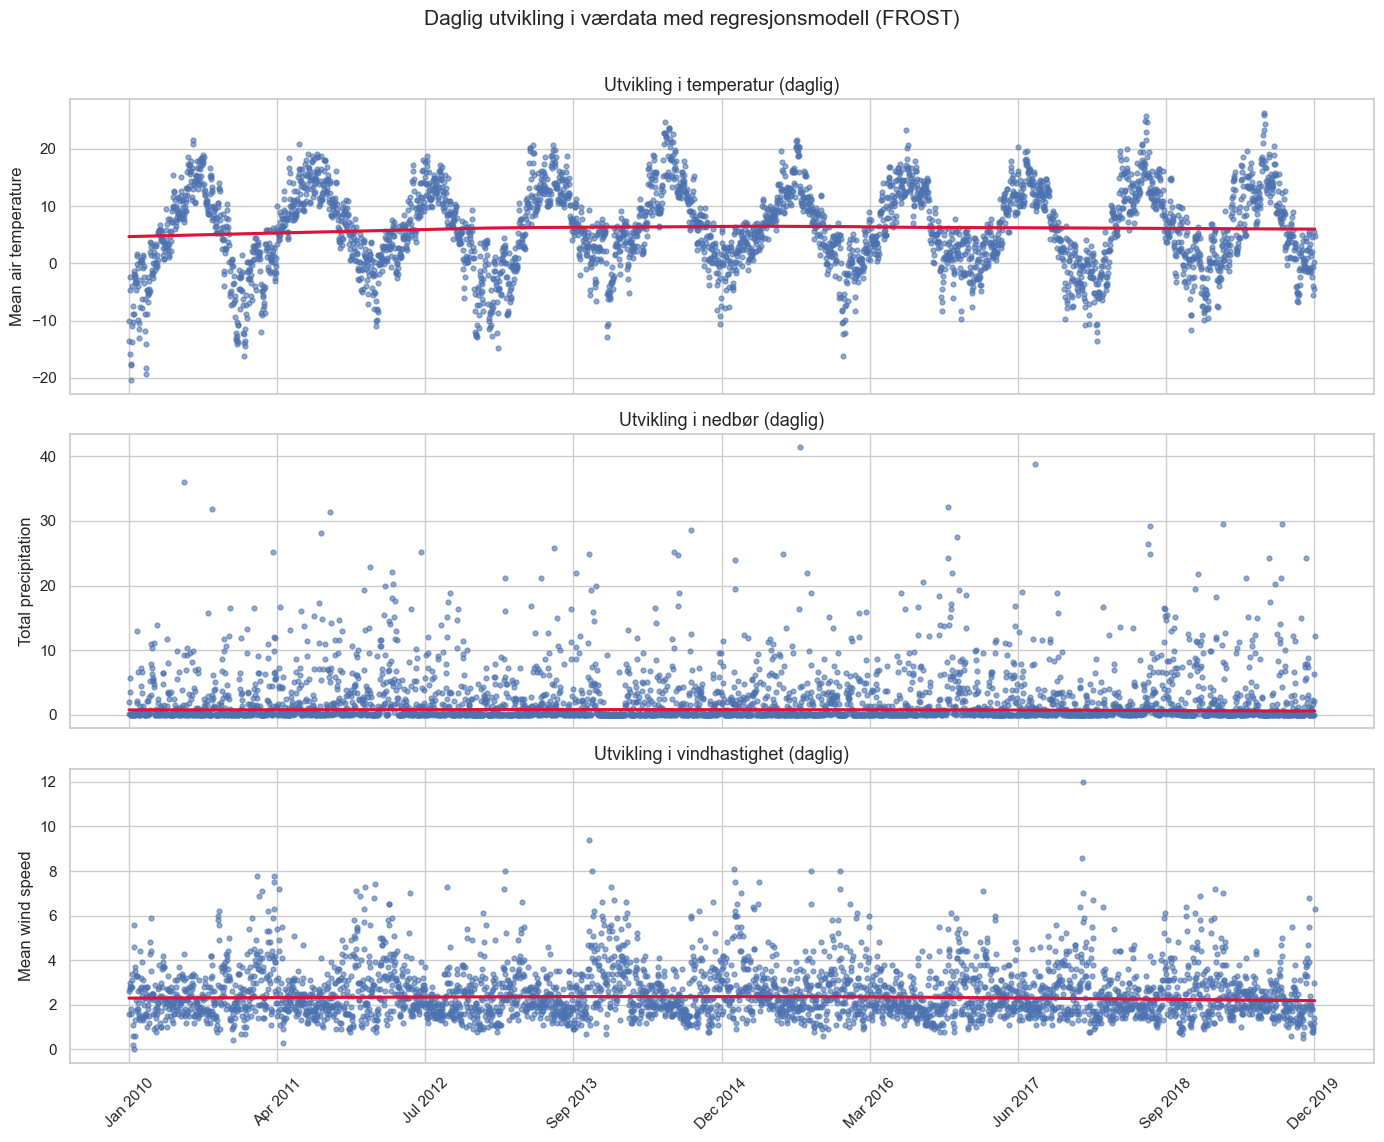

In [8]:
# 1. Importer funksjonen fra riktig modul
from data_visualizations.frost_visualization.daily_weather_trend_regression import plot_weather_components

# 2. Kjør funksjonen med riktig sti til databasen
plot_weather_components("../data/clean/frost.db")

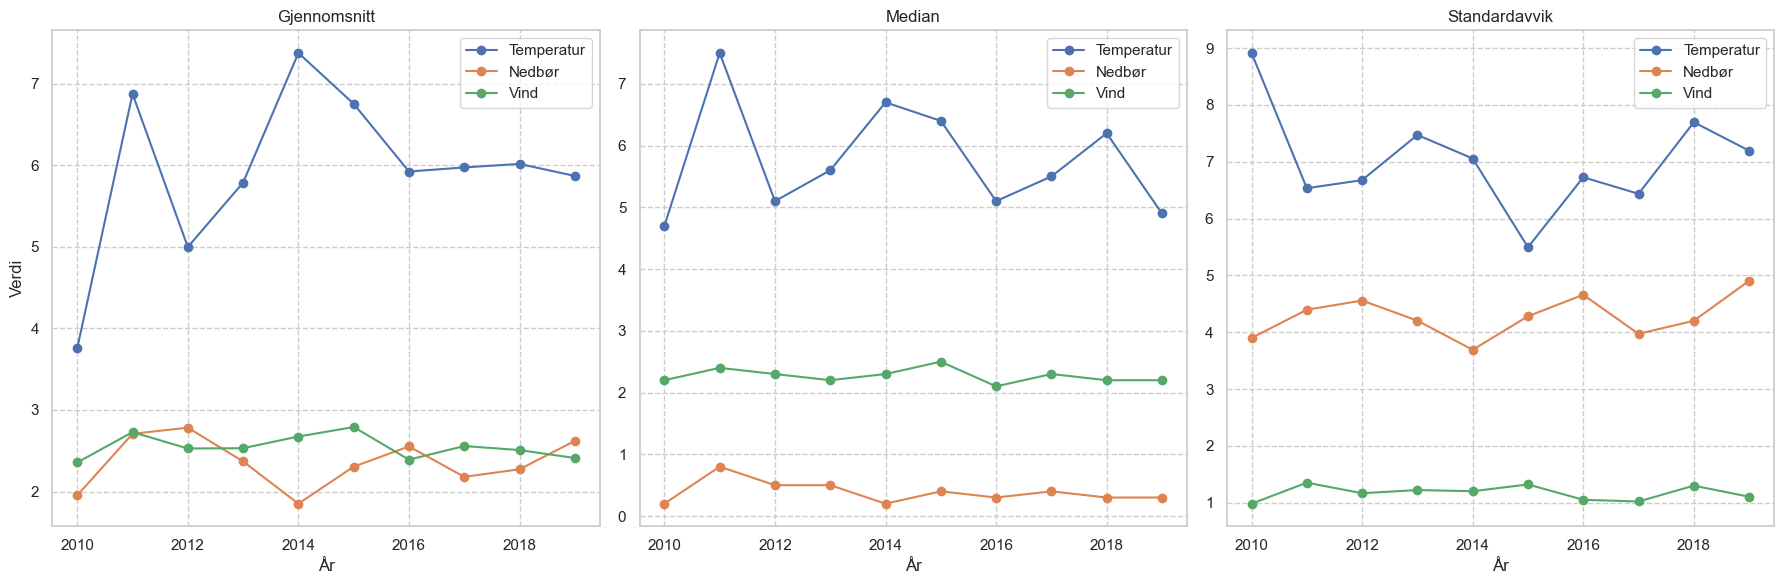

In [26]:
from data_visualizations.frost_visualization.frost_yearly_statistics_visualization import vis_frost_statistikk_per_år

vis_frost_statistikk_per_år("../data/analyses_results/frost_aggregated_stats_year.csv")


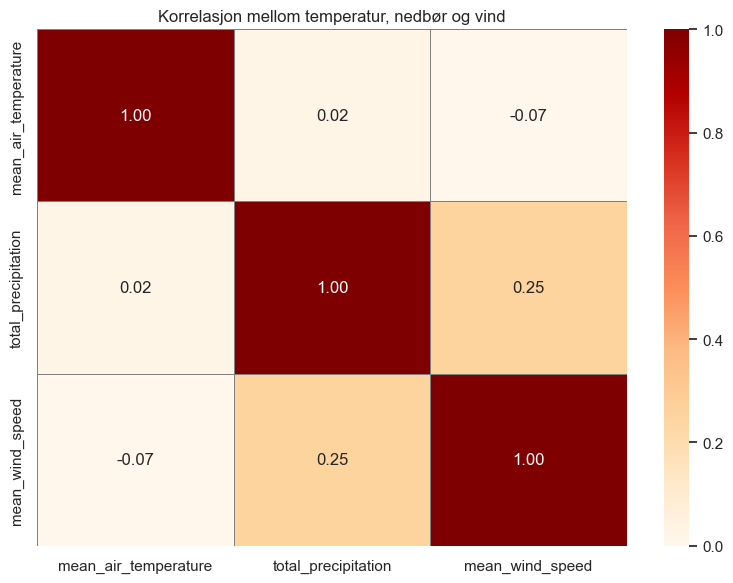

In [11]:

from data_visualizations.frost_visualization.correlation import vis_frost_korrelasjon

vis_frost_korrelasjon("../data/analyses_results/frost_correlation_matrix.csv")

/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/frost_visualization/precipitation_boxplot.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




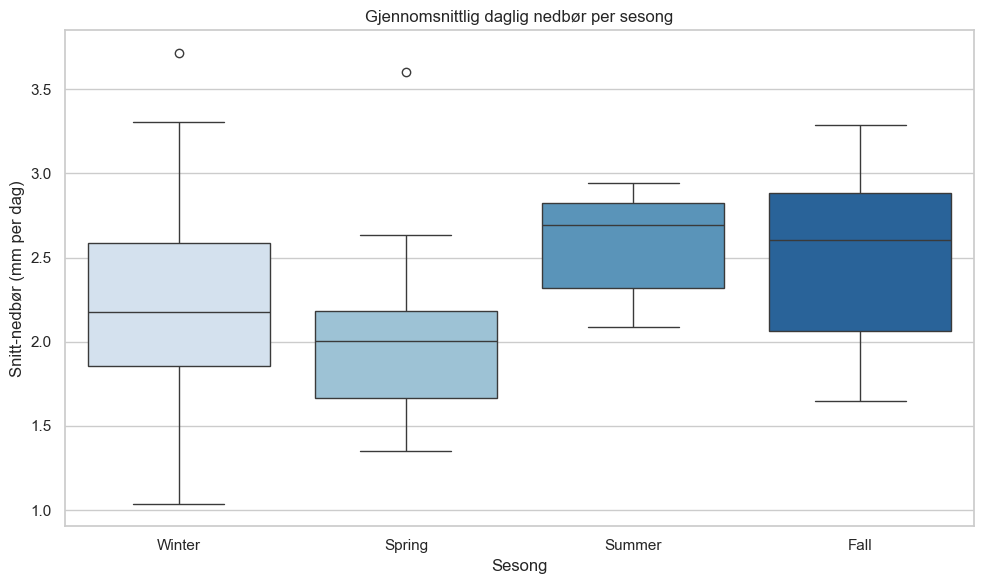

In [29]:
from data_visualizations.frost_visualization.precipitation_boxplot import vis_nedbør_per_sesong

vis_nedbør_per_sesong("../data/clean/frost.db")


/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/frost_visualization/temperature_boxplot.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




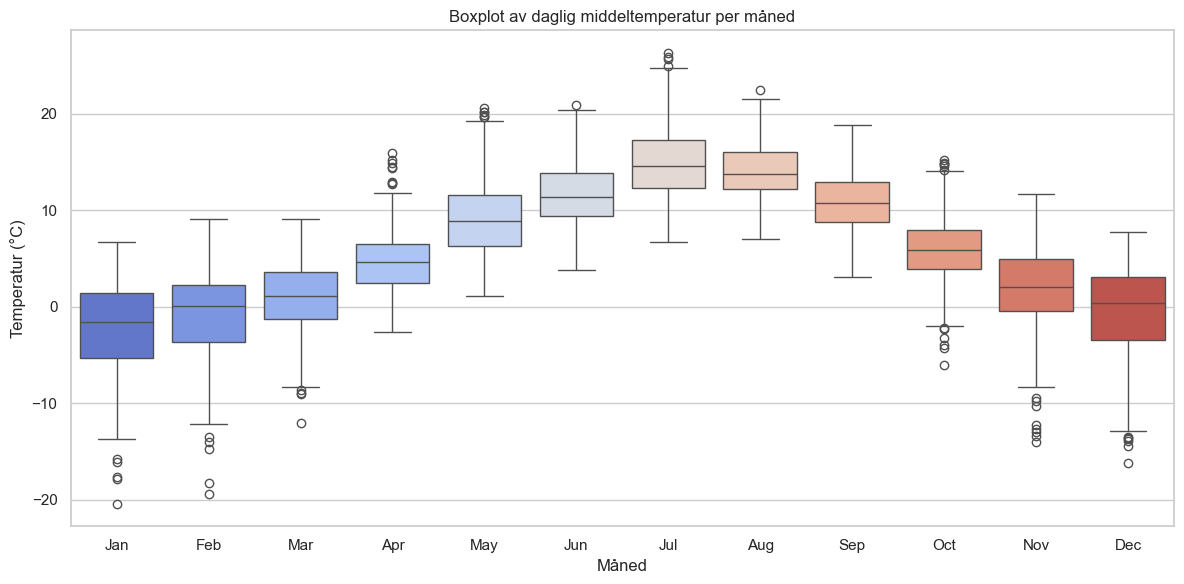

In [48]:

from data_visualizations.frost_visualization.temperature_boxplot import vis_middeltemp_per_måned


vis_middeltemp_per_måned("../data/clean/frost.db")



### 🌦️ - NILU Data

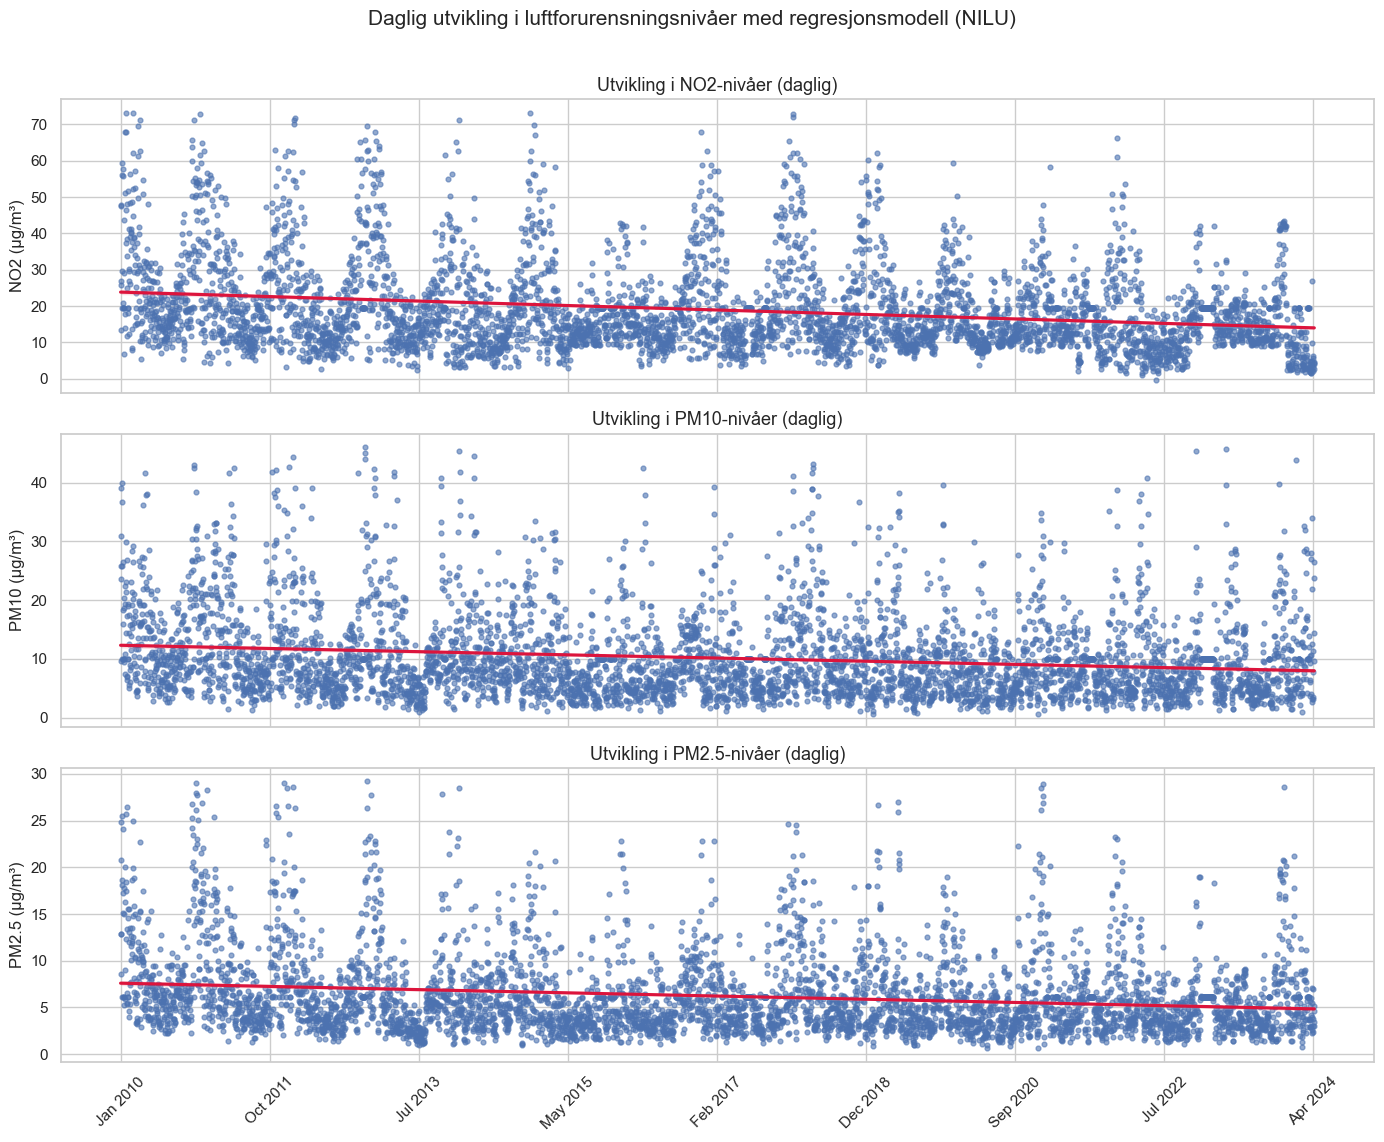

In [50]:
from data_visualizations.nilu_visualization.daily_pollution_trend_regression import vis_luftkvalitet_regresjon_nilu

vis_luftkvalitet_regresjon_nilu("../data/clean/cleaned_data_nilu.json")


/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/nilu_visualization/nilu_yearly_statistics_visualization.py:45: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



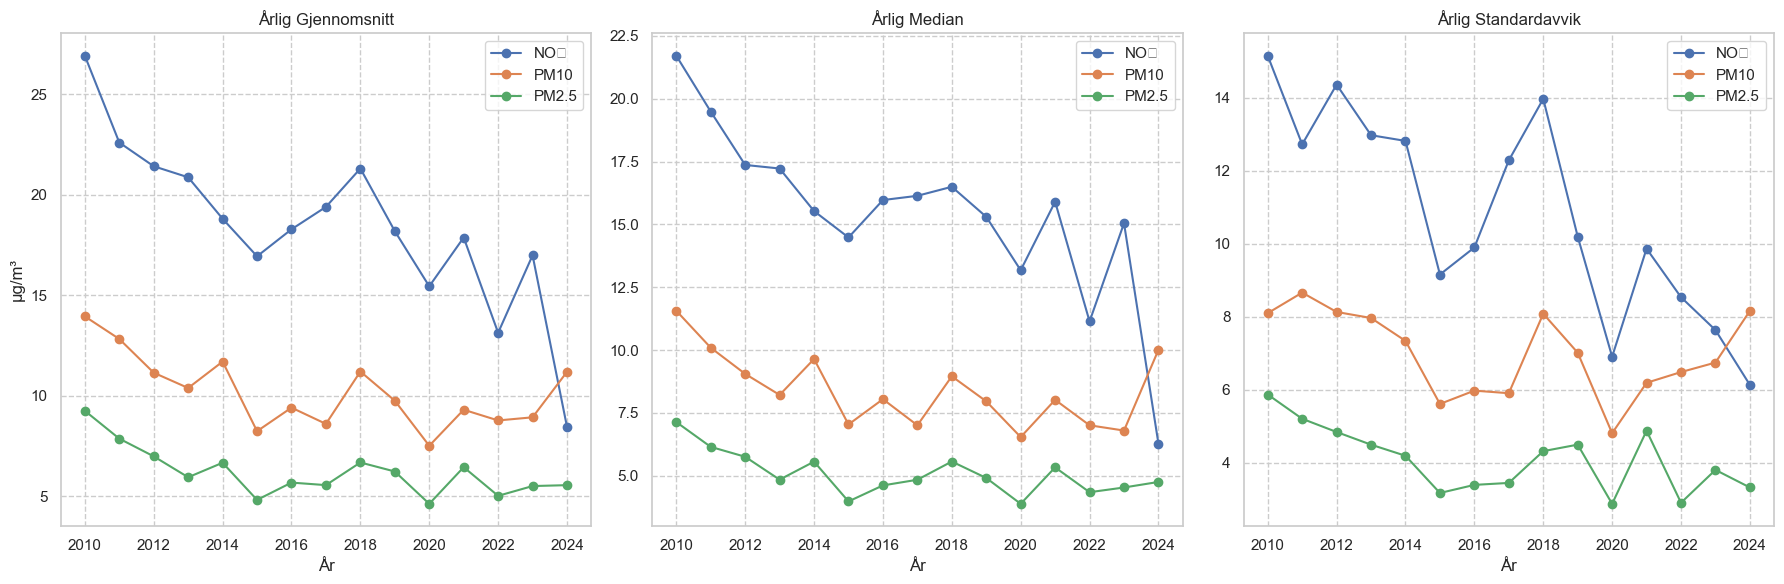

In [61]:
from data_visualizations.nilu_visualization.nilu_yearly_statistics_visualization import vis_nilu_statistikk_per_år

vis_nilu_statistikk_per_år("../data/analyses_results/nilu_aggregated_stats_year.csv")


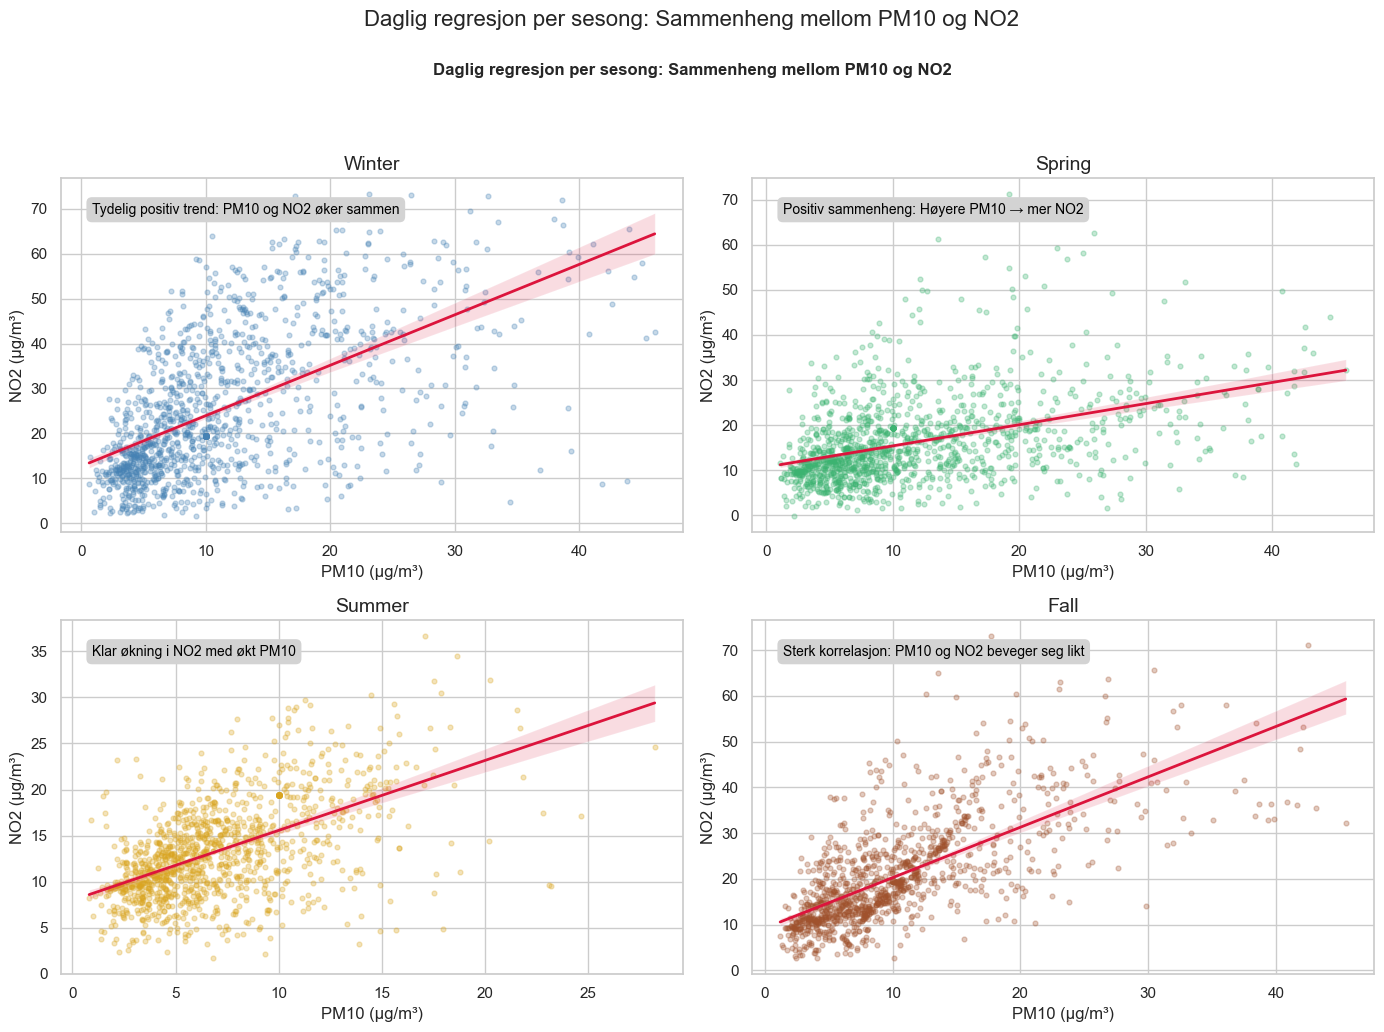

In [55]:
from data_visualizations.nilu_visualization.NO2_vs_PM10 import vis_pm10_vs_no2_per_sesong

vis_pm10_vs_no2_per_sesong("../data/clean/cleaned_data_nilu.json")


/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/nilu_visualization/correlation.py:13: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



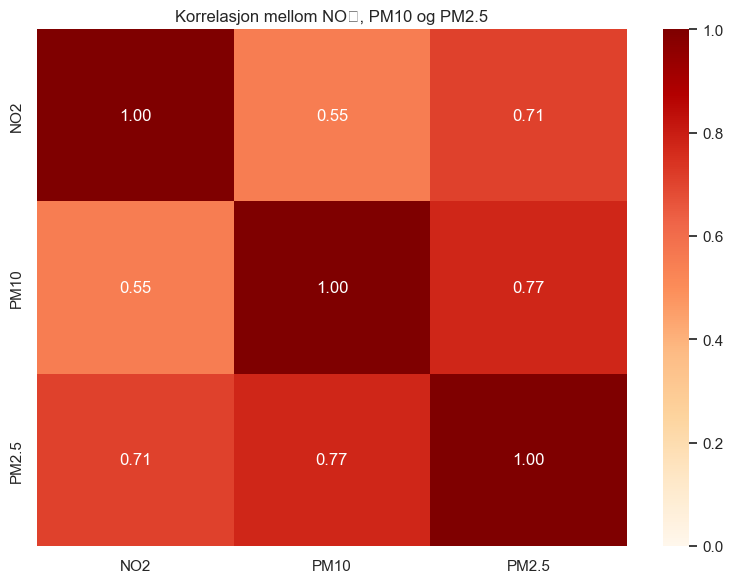

In [52]:
from data_visualizations.nilu_visualization.correlation import vis_korrelasjon_nilu

vis_korrelasjon_nilu("../data/analyses_results/nilu_correlation_matrix.csv")


/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/nilu_visualization/no2_boxplot_by_month.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/nilu_visualization/no2_boxplot_by_month.py:28: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



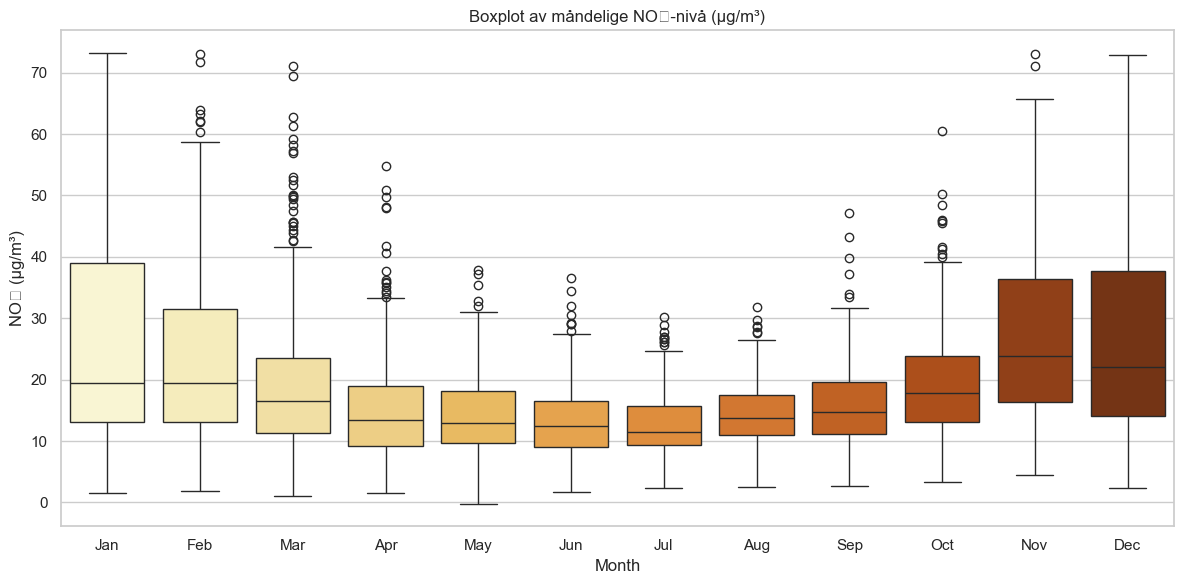

In [54]:
from data_visualizations.nilu_visualization.no2_boxplot_by_month import vis_no2_boxplot_per_måned

vis_no2_boxplot_per_måned("../data/clean/cleaned_data_nilu.json")


/Users/ahmedsalameh/Documents/Anvendt Programmering/Prosjek - Del 1/prosjekt_miljodataanalyse/src/data_visualizations/nilu_visualization/pm10_boxplot_by_season.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




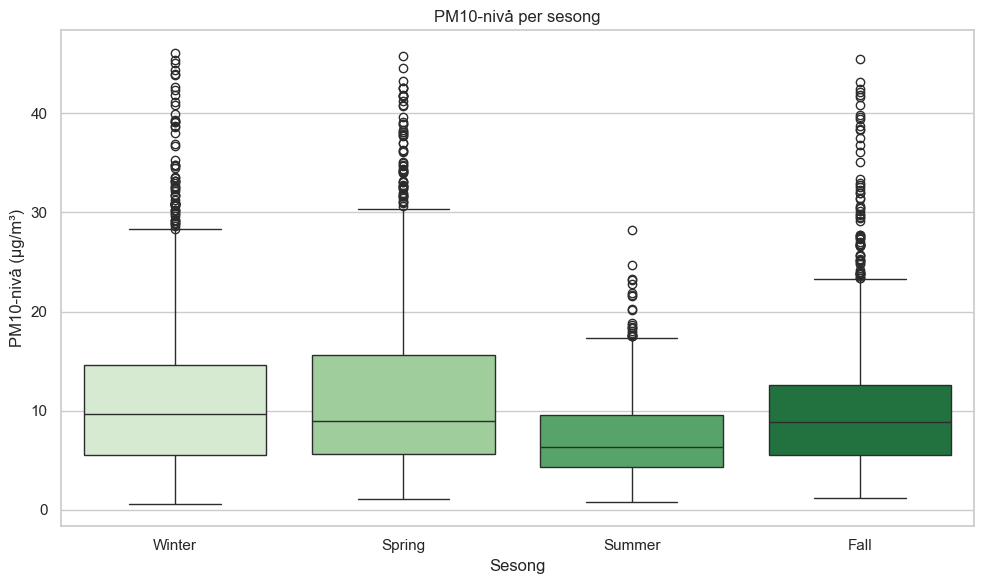

In [56]:
from data_visualizations.nilu_visualization.pm10_boxplot_by_season import vis_pm10_boxplot_per_sesong

vis_pm10_boxplot_per_sesong("../data/clean/cleaned_data_nilu.json")
